In [1]:
import pandas as pd
import numpy as np
from path import Path
from sklearn import tree
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

In [2]:
# import the modules
import pandas as pd
from sqlalchemy import create_engine

# SQLAlchemy connectable
crm = create_engine('sqlite:///chicago_crime.db').connect()

# table named 'crime_data' will be returned as a dataframe.
df = pd.read_sql_table('crime_data', crm)
print(df)

In [3]:
# Loading crime data
file_path = Path("Resources/sample_crime_data.csv")
df = pd.read_csv(file_path)
df = df.set_index("ID")
print(df.shape)
df.head()

(206997, 18)


,ID.1,Block,IUCR,Primary Type,Violence Status,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Date,Time
ID,,,,,,,,,,,,,,,,,,
6909918,12260346,070XX S EGGLESTON AVE,0486,BATTERY,VIOLENT,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,7.0,6.0,68.0,08B,2021,41.766435,-87.635964,2021-01-03,13:23:00
6927718,12263464,080XX S YALE AVE,0820,THEFT,NON-VIOLENT,$500 AND UNDER,RESIDENCE,False,False,6.0,17.0,44.0,06,2021,41.748474,-87.630607,2021-01-03,06:59:00
6927807,12259990,056XX W WASHINGTON BLVD,0486,BATTERY,VIOLENT,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,15.0,29.0,25.0,08B,2021,41.882224,-87.766076,2021-01-03,00:20:00
6931849,12260669,057XX S RACINE AVE,2022,NARCOTICS,NON-VIOLENT,POSSESS - COCAINE,STREET,True,False,7.0,16.0,67.0,18,2021,41.790069,-87.654769,2021-01-03,20:47:00
6931854,25702,068XX S STONY ISLAND AVE,0110,HOMICIDE,VIOLENT,FIRST DEGREE MURDER,STREET,False,False,3.0,5.0,43.0,01A,2021,41.771062,-87.586271,2021-01-03,20:09:00


In [4]:
df['Violence Status'].value_counts()

NON-VIOLENT    135435
VIOLENT         71562
Name: Violence Status, dtype: int64

In [5]:
street_df = df[(df['Location Description'] == 'STREET') & (df['Date'] >= '2015-01-01')]

In [6]:
street_df = street_df.drop(columns=['ID.1', 'Block', 'IUCR', 'Description', 'Primary Type','Location Description','Arrest','Domestic',
                                    'FBI Code', 'Year', 'Ward', 'District', 'Time', 'Latitude', 'Longitude'])
print(street_df.shape)
street_df.head()

(52382, 3)


,Violence Status,Community Area,Date
ID,,,
6931849,NON-VIOLENT,67.0,2021-01-03
6931854,VIOLENT,43.0,2021-01-03
6940399,NON-VIOLENT,43.0,2021-01-03
6940417,NON-VIOLENT,41.0,2021-01-03
6955690,NON-VIOLENT,75.0,2021-01-03


In [7]:
# Loading weather data
file_path = Path("Resources/clean_weather_data.csv")
weather_df = pd.read_csv(file_path)
#df = df.set_index("ID")
print(df.shape)
weather_df.head()

(206997, 18)


,Date,Average_Wind_Speed,Average_Temperature,Maximum_Temperature,Minimum_Temperature,Fog_Ice_Freezing_Fog,Heavy_Fog_or_Heavy_Freezing_Fog,Thunder,Hail,Smoke_or_Haze,Mist,Rain,Freezing_Rain,Snow_Snow_Pellets_or_Ice Crystals
0,2010-01-01,10.29,NaN,16.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,2010-01-02,11.86,NaN,11.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,10.29,NaN,18.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,2010-01-04,11.41,NaN,18.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
4,2010-01-05,8.50,NaN,23.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [8]:
weather_df = weather_df[(weather_df['Date'] >= '2015-01-01')]

In [9]:
weather_df = weather_df.drop(columns = ['Heavy_Fog_or_Heavy_Freezing_Fog', 'Mist', 'Freezing_Rain', 'Thunder',
                                        'Snow_Snow_Pellets_or_Ice Crystals', 'Hail', 'Rain',
                                       'Maximum_Temperature', 'Minimum_Temperature'])
print(weather_df.shape)
weather_df.head()

(2566, 5)


,Date,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
1826,2015-01-01,14.54,20.0,NaN,NaN
1827,2015-01-02,4.70,26.0,NaN,NaN
1828,2015-01-03,5.59,31.0,1.0,NaN
1829,2015-01-04,15.88,29.0,1.0,1.0
1830,2015-01-05,10.29,2.0,1.0,1.0


In [10]:
merged_df = pd.merge(street_df, weather_df, how='left', on='Date')

In [11]:
print(merged_df.shape)
merged_df.head()

(52382, 7)


,Violence Status,Community Area,Date,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
0,NON-VIOLENT,67.0,2021-01-03,6.93,32.0,1.0,NaN
1,VIOLENT,43.0,2021-01-03,6.93,32.0,1.0,NaN
2,NON-VIOLENT,43.0,2021-01-03,6.93,32.0,1.0,NaN
3,NON-VIOLENT,41.0,2021-01-03,6.93,32.0,1.0,NaN
4,NON-VIOLENT,75.0,2021-01-03,6.93,32.0,1.0,NaN


In [12]:
merged_df.columns

Index(['Violence Status', 'Community Area', 'Date', 'Average_Wind_Speed',
       'Average_Temperature', 'Fog_Ice_Freezing_Fog', 'Smoke_or_Haze'],
      dtype='object')

In [13]:
# df = merged_df[['Violence Status', 'Community Area', 'Average_Temperature']]
# print(df.shape)
# df.head()

In [14]:
df = merged_df.replace(np.nan,0).drop(columns=['Date'])
df.head()

,Violence Status,Community Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
0,NON-VIOLENT,67.0,6.93,32.0,1.0,0.0
1,VIOLENT,43.0,6.93,32.0,1.0,0.0
2,NON-VIOLENT,43.0,6.93,32.0,1.0,0.0
3,NON-VIOLENT,41.0,6.93,32.0,1.0,0.0
4,NON-VIOLENT,75.0,6.93,32.0,1.0,0.0


In [15]:
df.columns

Index(['Violence Status', 'Community Area', 'Average_Wind_Speed',
       'Average_Temperature', 'Fog_Ice_Freezing_Fog', 'Smoke_or_Haze'],
      dtype='object')

In [16]:
df.nunique()

Violence Status          2
Community Area          77
Average_Wind_Speed      68
Average_Temperature     76
Fog_Ice_Freezing_Fog     2
Smoke_or_Haze            2
dtype: int64

In [17]:
y = df['Violence Status']
X = df.drop(columns='Violence Status')
X = pd.get_dummies(X)

In [18]:
print(X.shape)
print(y.shape)
X.head()


(52382, 5)
(52382,)


,Community Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
0,67.0,6.93,32.0,1.0,0.0
1,43.0,6.93,32.0,1.0,0.0
2,43.0,6.93,32.0,1.0,0.0
3,41.0,6.93,32.0,1.0,0.0
4,75.0,6.93,32.0,1.0,0.0


In [19]:
X.describe()

,Community Area,Average_Wind_Speed,Average_Temperature,Fog_Ice_Freezing_Fog,Smoke_or_Haze
count,52382.000000,52382.000000,52382.000000,52382.000000,52382.000000
mean,37.714902,9.086781,55.430300,0.346760,0.150949
std,21.005551,3.508695,19.110416,0.475943,0.358002
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,6.710000,40.000000,0.000000,0.000000
50%,32.000000,8.720000,57.000000,0.000000,0.000000
75%,56.000000,10.960000,72.000000,1.000000,0.000000
max,77.000000,27.960000,84.000000,1.000000,1.000000


In [20]:
y.value_counts()

NON-VIOLENT    38149
VIOLENT        14233
Name: Violence Status, dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

X_train.shape

(39286, 5)

In [22]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [24]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [25]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [26]:
predictions

array(['VIOLENT', 'NON-VIOLENT', 'NON-VIOLENT', ..., 'NON-VIOLENT',
       'NON-VIOLENT', 'NON-VIOLENT'], dtype=object)

In [27]:
rf_model.predict(X_test_scaled)

array(['VIOLENT', 'NON-VIOLENT', 'NON-VIOLENT', ..., 'NON-VIOLENT',
       'NON-VIOLENT', 'NON-VIOLENT'], dtype=object)

In [28]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual Non-voilent", "Actual Violent"], columns=["Predicted Non-violent", "Predicted Violent"])

cm_df

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [29]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted Non-violent,Predicted Violent
Actual Non-voilent,7892,1646
Actual Violent,2867,691


Accuracy Score : 0.6553909590714722
Classification Report
              precision    recall  f1-score   support

 NON-VIOLENT       0.73      0.83      0.78      9538
     VIOLENT       0.30      0.19      0.23      3558

    accuracy                           0.66     13096
   macro avg       0.51      0.51      0.51     13096
weighted avg       0.61      0.66      0.63     13096



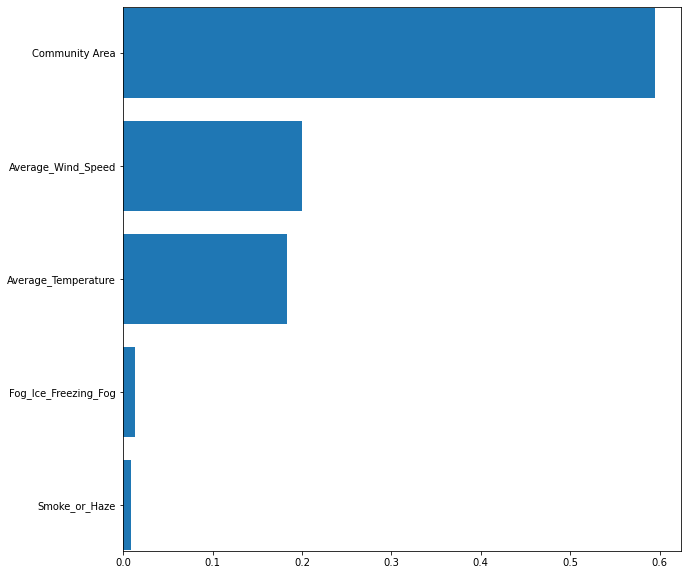

In [30]:
feature_importances = rf_model.feature_importances_
%matplotlib inline
from matplotlib import pyplot as plt
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()


C:\Users\kyobu\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


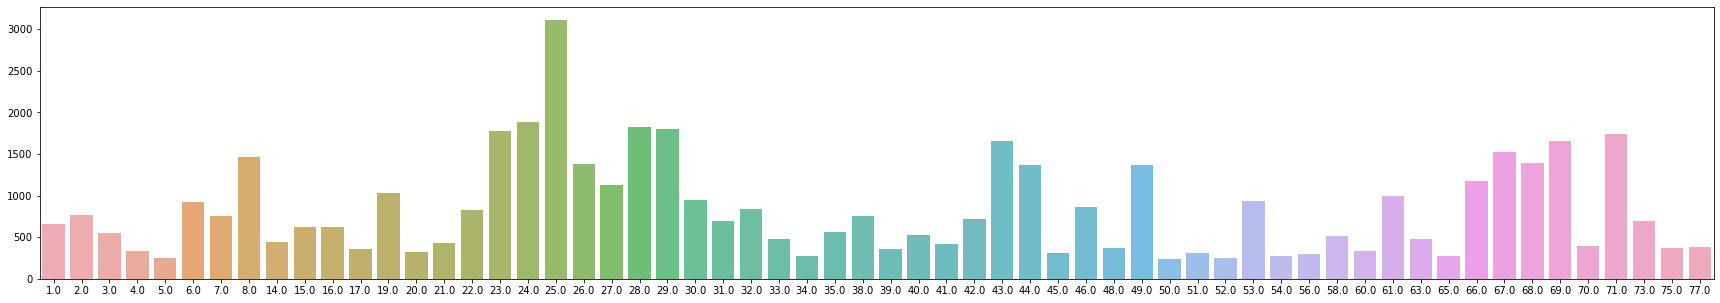

In [31]:
import seaborn as sns

comm_count = df['Community Area'].value_counts()
comm_count = comm_count[:50,]
plt.figure(figsize=(30,5))
sns.barplot(comm_count.index, comm_count.values, alpha=0.8)
plt.show()

C:\Users\kyobu\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


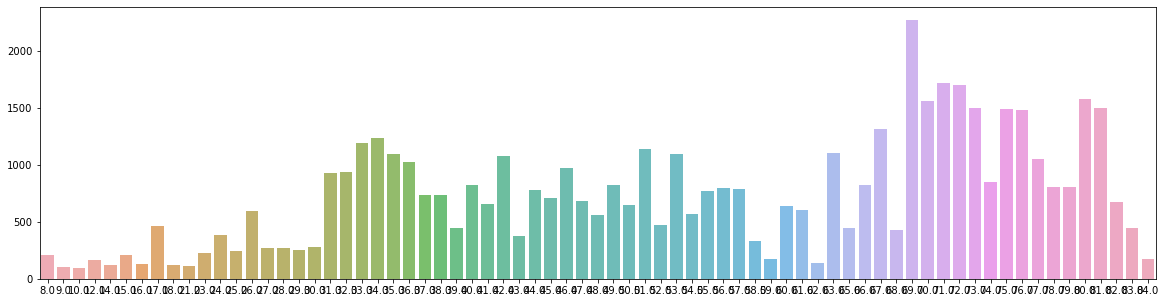

In [32]:
temp_count = df['Average_Temperature'].value_counts()
temp_count = temp_count[:10,]
plt.figure(figsize=(20,5))
sns.barplot(temp_count.index, temp_count.values, alpha=0.8)
plt.show()

In [37]:
rf_model.predict([[25, 0, 89, 0, 0]])

array(['NON-VIOLENT'], dtype=object)